<a href="https://colab.research.google.com/github/IbukunOlowo/Face-recognition-Machine-learning/blob/main/Face_Recognition_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connecting Google Colab to Google Drive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd


In [ ]:
data=np.load("/content/drive/My Drive/input/olivetti_faces.npy")
target=np.load("/content/drive/My Drive/input/olivetti_faces_target.npy")

In [ ]:
data

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [ ]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


Lets try to show one of the images in the dataset

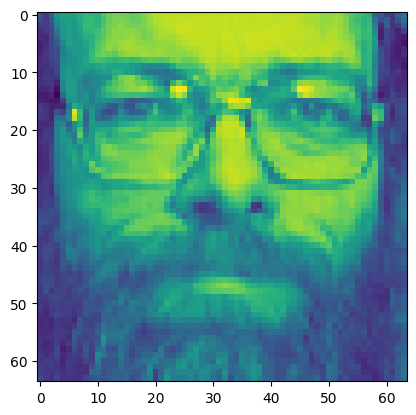

In [ ]:
image_alea=data[360]
plt.imshow(image_alea)

Lets try to show 10 faces of n subject from the olivetti data

[7, 26, 7, 25, 13]


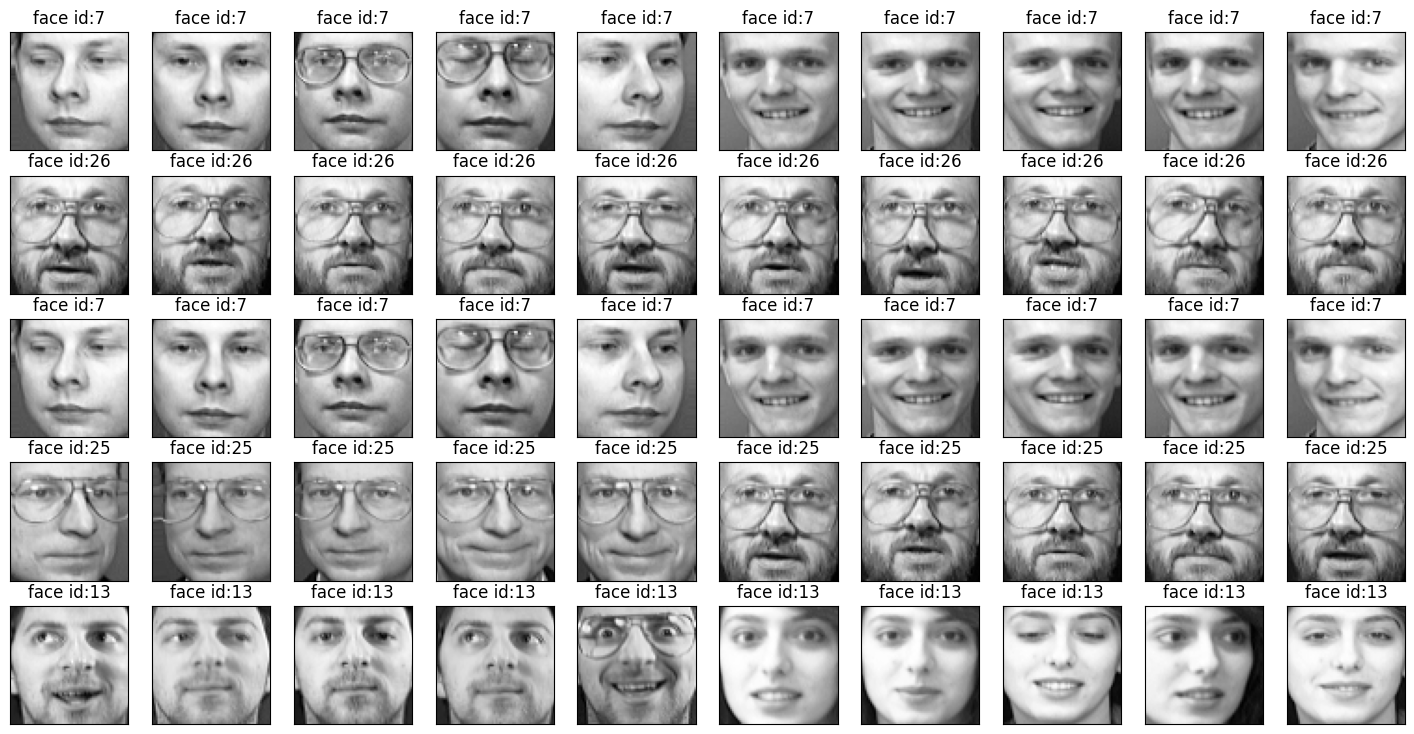

In [ ]:
import random

def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)

    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()

    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*5+ j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

n =5
subject_ids = [random.randint(1, 40) for _ in range(n)]
print(subject_ids)
show_10_faces_of_n_subject(data, subject_ids)

In [ ]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [ ]:
S

X_train shape: (280, 4096)
y_train shape:(280,)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (280, 4096)
y_train shape: (280,)
X_test shape: (120, 4096)
y_test shape: (120,)


In [ ]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
import mglearn

In [ ]:
P

In [ ]:
print(X_train)

[[ 1.0288308   1.4288532   1.317768   ... -0.6412514  -0.38711953
  -0.30036184]
 [-1.3109629  -0.9353101  -1.3298162  ... -0.5770039  -0.43196586
  -0.53077644]
 [-0.8244712  -0.9353101  -1.1163014  ... -1.1980631  -1.10466
  -1.0837713 ]
 ...
 [-1.3109629  -0.7791861   0.44235703 ...  0.10830292  0.26315165
   0.36784044]
 [ 0.9824981   0.8935706   0.8053323  ... -0.7483306  -0.8355824
  -0.8763983 ]
 [-0.8244712  -1.1583443  -1.009544   ... -0.0201921  -0.07319562
  -0.1390716 ]]


In [ ]:
n_components = 200

print(f"Extracting the top {n_components} eigenfaces from {X_train.shape[0]} faces")
start_time = time()
pca = PCA(n_components=n_components, whiten=True, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
end_time = time()
time_pca = end_time - start_time
print(f"PCA fitting and transformation took {time_pca:.4f} seconds.")

Extracting the top 200 eigenfaces from 280 faces
PCA fitting and transformation took 1.6365 seconds.


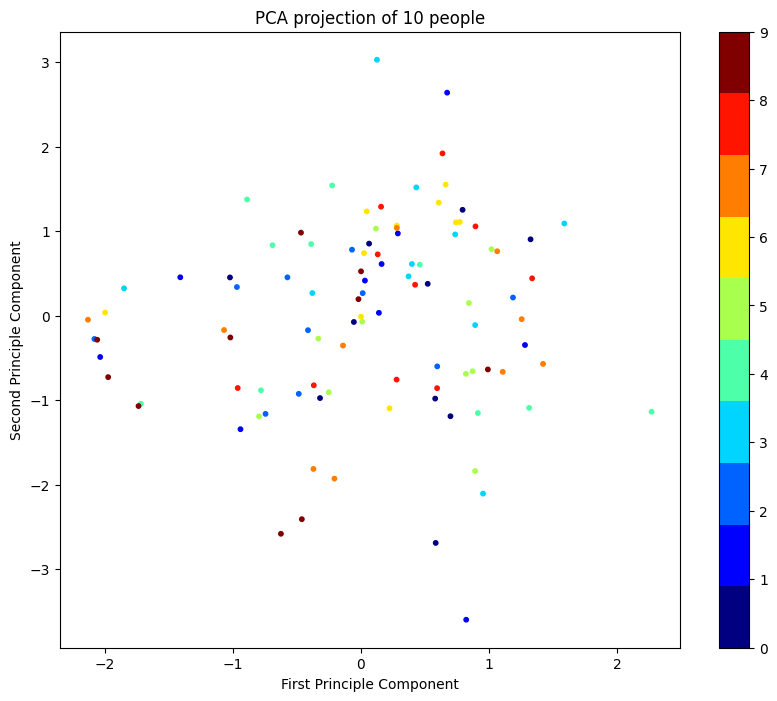

In [ ]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_test_pca[:index_range,0],
            X_test_pca[:index_range,1],
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

X shape: (400, 4096)


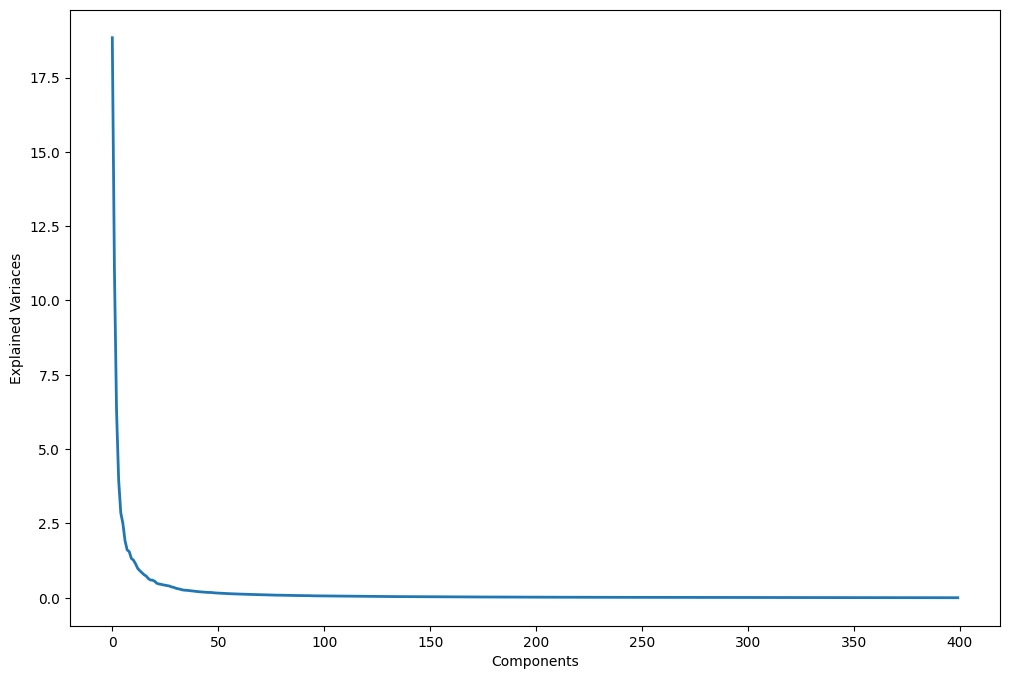

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)

plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("SVM",SVC()))
models.append(("RF", RandomForestClassifier()))


for name, model in models:

    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA RESULT ==========
Accuracy score:0.98

========== LR RESULT ==========
Accuracy score:0.97

========== KNN RESULT ==========
Accuracy score:0.47

========== SVM RESULT ==========
Accuracy score:0.97

========== RF RESULT ==========
Accuracy score:0.93



According to the above result Linear Discriminant analysis and Logistic Regression perform the best

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params':{
            'C': [0.1,1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [1,10,20],
            'max_depth': [None, 10, 20, 30],
        }
    },
    'KNN':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors': [3,5,7,11],
            'weights': ['uniform','distance'],
            'metric': ['euclidean','manhattan']
        }
    }
}

In [ ]:
aa

In [ ]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.939286,"{'C': 0.1, 'kernel': 'linear'}"
1,random_forest,0.825000,"{'max_depth': None, 'n_estimators': 20}"
2,KNN,0.842857,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."


In [ ]:
("""from sklearn.model_selection import RandomizedSearchCV
scores1 = []


for model_name, mp in model_params.items():
  clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores1.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  }) """_)

In [ ]:
#df = pd.DataFrame(scores1,columns=['model','best_score','best_params'])
#df

,model,best_score,best_params
0,svm,0.939286,"{'kernel': 'linear', 'C': 0.1}"
1,random_forest,0.817857,"{'n_estimators': 20, 'max_depth': None}"
2,KNN,0.807143,"{'weights': 'distance', 'n_neighbors': 5, 'met..."


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report

clf = SVC(C = 1, kernel = 'linear')
clf.fit(X_train_pca, y_train)
start_time = time()
y_pred = clf.predict(X_test_pca)
end_time = time()
print("Predicting  on the test set done in %0.3fs" % (end_time - start_time))
print("With An accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))


Predicting  on the test set done in 0.005s
With An accuracy score: 0.97


<Axes: >

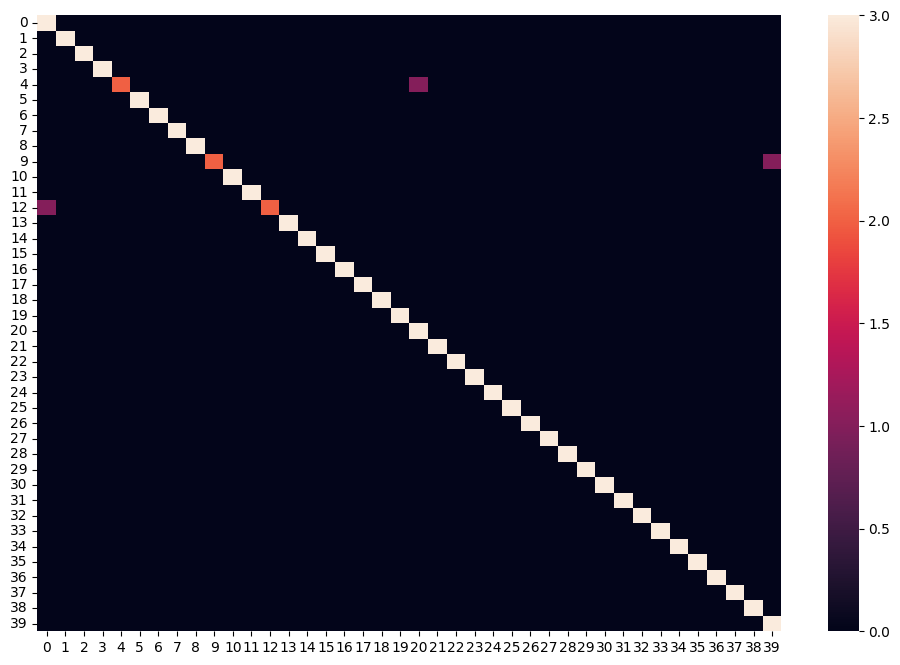

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

**Validated** **Results**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

LDA mean cross validations score:0.92
LR mean cross validations score:0.83
KNN mean cross validations score:0.33
SVM mean cross validations score:0.53
RF mean cross validations score:0.83


According to the cross validation scores Linear Discriminant Analysis and Logistic Regression still have best performance alongisde Random Forest

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import classification_report

clf = LinearDiscriminantAnalysis()
clf.fit(X_train_pca, y_train)
start_time = time()
y_pred = clf.predict(X_test_pca)
end_time = time()
print("Predicting  on the test set done in %0.3fs" % (end_time - start_time))
print("With An accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))


Predicting  on the test set done in 0.001s
With An accuracy score: 0.98


<Axes: >

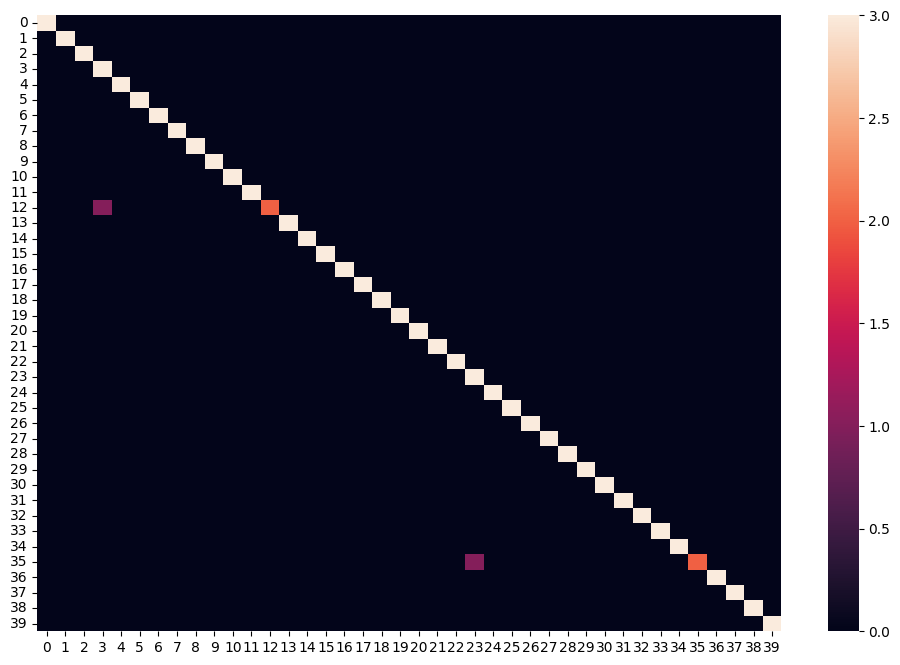

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

clf = LogisticRegression()
clf.fit(X_train_pca, y_train)
start_time = time()
y_pred = clf.predict(X_test_pca)
end_time = time()
print("Predicting  on the test set done in %0.3fs" % (end_time - start_time))
print("With An accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))


Predicting  on the test set done in 0.001s
With An accuracy score: 0.97


<Axes: >

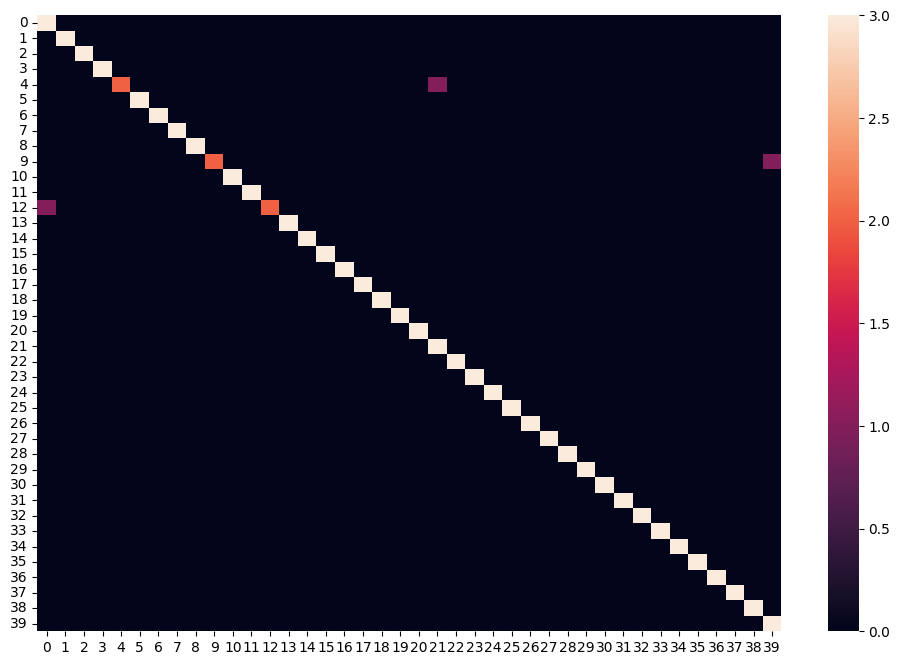

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

clf = RandomForestClassifier(max_depth= None, n_estimators= 20)
clf.fit(X_train_pca, y_train)
start_time = time()
y_pred = clf.predict(X_test_pca)
end_time = time()
print("Predicting  on the test set done in %0.3fs" % (end_time - start_time))
print("With An accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Predicting  on the test set done in 0.012s
With An accuracy score: 0.75


<Axes: >

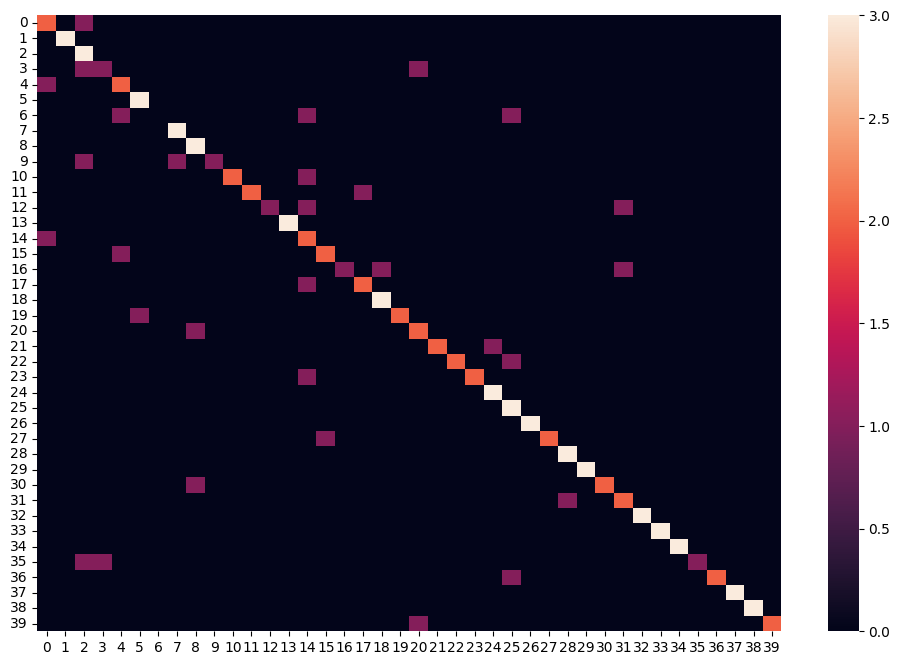

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      1.00      1.00         3
           2       0.43      1.00      0.60         3
           3       0.50      0.33      0.40         3
           4       0.50      0.67      0.57         3
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         3
           7       0.75      1.00      0.86         3
           8       0.60      1.00      0.75         3
           9       1.00      0.33      0.50         3
          10       1.00      0.67      0.80         3
          11       1.00      0.67      0.80         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       0.29      0.67      0.40         3
          15       0.67      0.67      0.67         3
          16       1.00      0.33      0.50         3
   

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights= 'distance')
clf.fit(X_train_pca, y_train)
start_time = time()
y_pred = clf.predict(X_test_pca)
end_time = time()
print("Predicting  on the test set done in %0.3fs" % (end_time - start_time))
print("With An accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Predicting  on the test set done in 0.006s
With An accuracy score: 0.77


<Axes: >

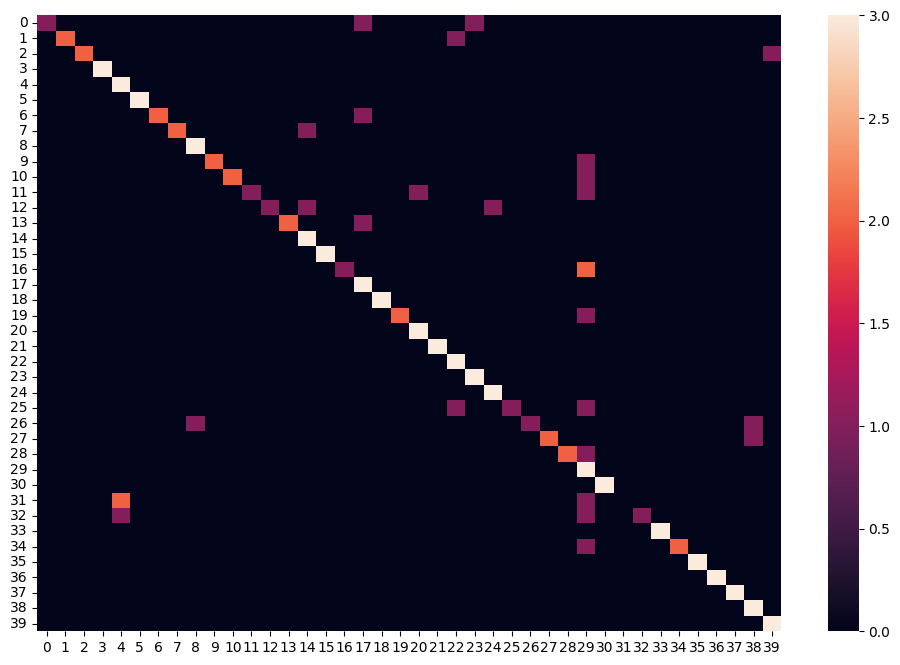

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      0.67      0.80         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       0.75      1.00      0.86         3
           9       1.00      0.67      0.80         3
          10       1.00      0.67      0.80         3
          11       1.00      0.33      0.50         3
          12       1.00      0.33      0.50         3
          13       1.00      0.67      0.80         3
          14       0.60      1.00      0.75         3
          15       1.00      1.00      1.00         3
          16       1.00      0.33      0.50         3
   